In [61]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_padronizado = pca.fit_transform(X_padronizado)

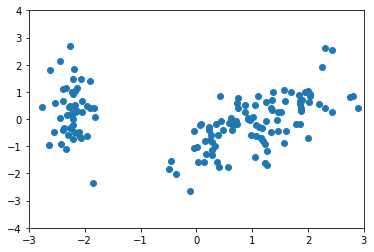

In [63]:
import numpy as np
from numpy import quantile, where, random
import matplotlib.pyplot as plt

plt.scatter(X_padronizado[:,0], X_padronizado[:,1])
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.show()

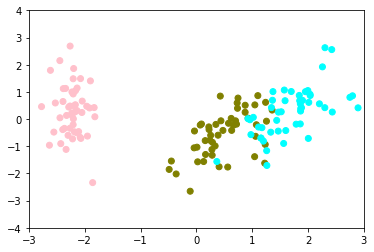

In [64]:
colormap = np.array(['pink', 'olive', 'cyan'])
plt.scatter(X_padronizado[:,0], X_padronizado[:,1], c=colormap[y])
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.show()

# LOF

In [65]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=5, p=1, contamination=0.05)
y_pred = lof.fit_predict(X_padronizado)

In [66]:
index = where(y_pred==-1)
index_copy = index #para usar abaixo
values = X_padronizado[index]
print(index)
print(len(index[0]))

(array([ 41,  60, 105, 109, 117, 118, 131, 135], dtype=int64),)
8


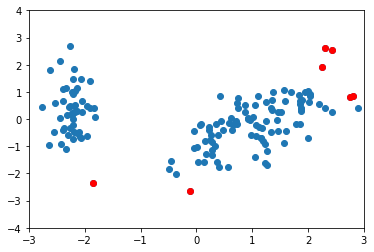

In [67]:
plt.scatter(X_padronizado[:,0], X_padronizado[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.show()

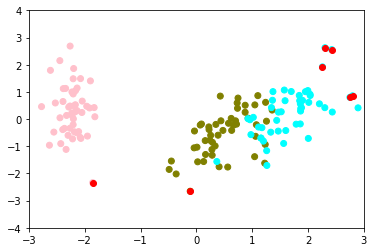

In [68]:
colormap = np.array(['pink', 'olive', 'cyan'])
plt.scatter(X_padronizado[:,0], X_padronizado[:,1], c=colormap[y])
plt.scatter(values[:,0],values[:,1], color='r')
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.show()

(array([1], dtype=int64),)
1
(array([0], dtype=int64),)
1


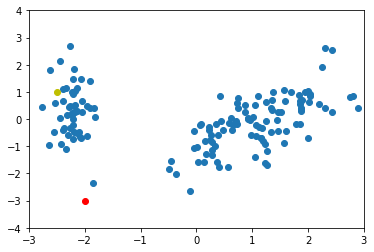

In [69]:
###NOVELTY-1
lof_nov = LocalOutlierFactor(n_neighbors=5, p=1, contamination=0.05, novelty=True)
lof_nov.fit(X_padronizado)

new_data = np.array([[-2.5, 1.0], [-2.0, -3.0]])
y_pred = lof_nov.predict(new_data)

index_n = where(y_pred==-1)
values_n = new_data[index_n]
print(index_n)
print(len(index_n[0]))

index = where(y_pred==1)
values = new_data[index]
print(index)
print(len(index[0]))

plt.scatter(X_padronizado[:,0], X_padronizado[:,1])
plt.scatter(values_n[:,0],values_n[:,1], color='r')
plt.scatter(values[:,0],values[:,1], color='y')
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.show()

In [70]:
###NOVELTY-2
###REMOVENDO OUTLIERS
print(len(X_padronizado))
X_padronizado_w_outlier = np.delete(X_padronizado, index_copy, 0)
print(len(X_padronizado_w_outlier))

150
142


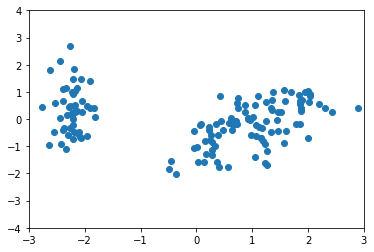

In [71]:
plt.scatter(X_padronizado_w_outlier[:,0], X_padronizado_w_outlier[:,1])
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.show()

(array([1], dtype=int64),)
1
(array([0], dtype=int64),)
1


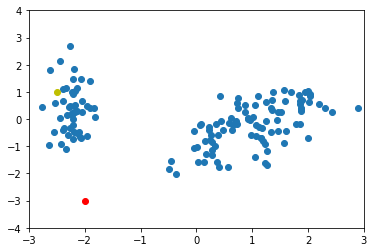

In [72]:
###NOVELTY-2
lof_nov = LocalOutlierFactor(n_neighbors=5, p=1, contamination=0.05, novelty=True)
lof_nov.fit(X_padronizado_w_outlier)

new_data = np.array([[-2.5, 1.0], [-2.0, -3.0]])
y_pred = lof_nov.predict(new_data)

index_n = where(y_pred==-1)
values_n = new_data[index_n]
print(index_n)
print(len(index_n[0]))

index = where(y_pred==1)
values = new_data[index]
print(index)
print(len(index[0]))

plt.scatter(X_padronizado_w_outlier[:,0], X_padronizado_w_outlier[:,1])
plt.scatter(values_n[:,0],values_n[:,1], color='r')
plt.scatter(values[:,0],values[:,1], color='y')
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.show()

# IsolationForest

In [73]:
from sklearn.ensemble import IsolationForest

clf_if = IsolationForest(random_state=0,contamination=0.05).fit(X_padronizado)
y_pred = clf_if.predict(X_padronizado)

In [74]:
index = where(y_pred==-1)
values = X_padronizado[index]
print(index)
print(len(index[0]))

(array([ 15,  32,  41,  60, 109, 117, 118, 131], dtype=int64),)
8


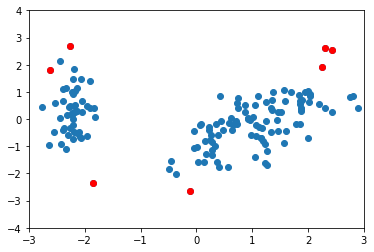

In [75]:
plt.scatter(X_padronizado[:,0], X_padronizado[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.show()

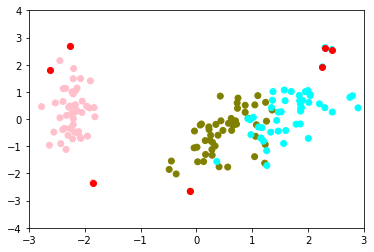

In [76]:
colormap = np.array(['pink', 'olive', 'cyan'])
plt.scatter(X_padronizado[:,0], X_padronizado[:,1], c=colormap[y])
plt.scatter(values[:,0],values[:,1], color='r')
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.show()

# OneClassSVM

In [77]:
from sklearn.svm import OneClassSVM

clf_one_svm = OneClassSVM(nu=0.05).fit(X_padronizado)
y_pred = clf_one_svm.predict(X_padronizado)

In [78]:
index = where(y_pred==-1)
values = X_padronizado[index]
print(index)
print(len(index[0]))

(array([ 15,  22,  41, 117, 118, 119, 131], dtype=int64),)
7


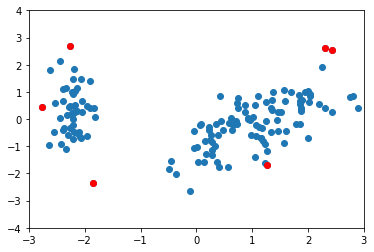

In [79]:
plt.scatter(X_padronizado[:,0], X_padronizado[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.show()

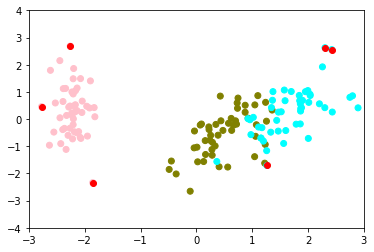

In [80]:
colormap = np.array(['pink', 'olive', 'cyan'])
plt.scatter(X_padronizado[:,0], X_padronizado[:,1], c=colormap[y])
plt.scatter(values[:,0],values[:,1], color='r')
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.show()